## Introduction


Crack detection has vital importance for structural health monitoring and inspection. For problem formulation, we will denote images of cracked concrete as the positive class and images of concrete with no cracks as the negative class.

In this notebook, I will walk through the process of loading and visualizing the image dataset. 


<a id='item11'></a>

## Download Data

Use the **wget** command to retrieve the data on a server.

In [3]:
# get the data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip

--2020-03-06 20:03:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245259777 (234M) [application/zip]
Saving to: ‘concrete_crack_images_for_classification.zip.1’

concrete_crack_imag 100%[===================>] 233.90M  9.91MB/s    in 14s     

2020-03-06 20:03:46 (17.1 MB/s) - ‘concrete_crack_images_for_classification.zip.1’ saved [245259777/245259777]



unzip the file to access the images.

In [ ]:
!unzip concrete_crack_images_for_classification.zip

Archive:  concrete_crack_images_for_classification.zip
  inflating: Negative/18476.jpg      
  inflating: Negative/00189.jpg      
  inflating: Negative/04111.jpg      
  inflating: Negative/03546.jpg      
  inflating: Negative/15250.jpg      
  inflating: Negative/17209.jpg      
  inflating: Negative/14677.jpg      
  inflating: Negative/11648.jpg      
  inflating: Negative/12536.jpg      
  inflating: Negative/14050.jpg      
  inflating: Negative/12304.jpg      
  inflating: Negative/15948.jpg      
  inflating: Negative/01891.jpg      
  inflating: Negative/00592.jpg      
  inflating: Negative/09713.jpg      
  inflating: Negative/19452.jpg      
  inflating: Negative/00236.jpg      
  inflating: Negative/16449.jpg      
  inflating: Negative/18460.jpg      
  inflating: Negative/06605.jpg      
  inflating: Negative/04206.jpg      
  inflating: Negative/11811.jpg      
  inflating: Negative/16110.jpg      
  inflating: Negative/14512.jpg      
  inflating: Negative/13440.jpg  

<a id='item12'></a>

## Import Libraries and Packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

<a id='item13'></a>

## Load Images

use **os.listdir**. to get negative images

In [2]:
negative_images = os.listdir('./Negative')
negative_images

['10954.jpg',
 '13745.jpg',
 '10495.jpg',
 '00316.jpg',
 '17259.jpg',
 '15775.jpg',
 '13384.jpg',
 '10006.jpg',
 '04592.jpg',
 '00624.jpg',
 '17441.jpg',
 '12661.jpg',
 '07088.jpg',
 '19026.jpg',
 '16599.jpg',
 '07670.jpg',
 '17818.jpg',
 '18704.jpg',
 '02855.jpg',
 '15867.jpg',
 '09145.jpg',
 '15284.jpg',
 '02421.jpg',
 '11820.jpg',
 '06388.jpg',
 '02444.jpg',
 '02734.jpg',
 '18383.jpg',
 '13962.jpg',
 '15642.jpg',
 '10092.jpg',
 '15730.jpg',
 '07416.jpg',
 '18875.jpg',
 '12533.jpg',
 '14515.jpg',
 '11632.jpg',
 '04415.jpg',
 '12247.jpg',
 '03410.jpg',
 '13129.jpg',
 '11773.jpg',
 '15248.jpg',
 '18934.jpg',
 '13599.jpg',
 '01738.jpg',
 '01398.jpg',
 '14911.jpg',
 '17825.jpg',
 '02440.jpg',
 '04796.jpg',
 '14219.jpg',
 '14655.jpg',
 '18398.jpg',
 '04579.jpg',
 '08094.jpg',
 '03826.jpg',
 '12736.jpg',
 '04895.jpg',
 '18178.jpg',
 '02838.jpg',
 '13201.jpg',
 '09738.jpg',
 '13908.jpg',
 '16455.jpg',
 '06732.jpg',
 '04760.jpg',
 '06428.jpg',
 '16715.jpg',
 '05383.jpg',
 '17410.jpg',
 '0168

Sort them

In [3]:
negative_images.sort()
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Use the **Image** module in the **PIL** library to open the first image

In [4]:
image_data = Image.open('./Negative/{}'.format(negative_images[0]))

View the image

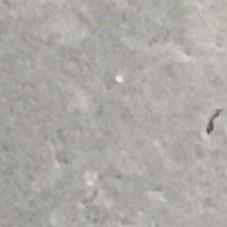

In [5]:
image_data

Use another way to view it

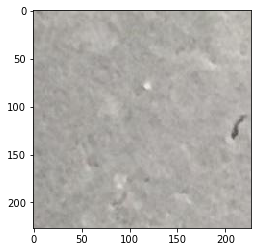

In [6]:
plt.imshow(image_data)

Loop through all the images in the <code>./Negative</code> directory and add save their paths.

In [7]:
negative_images_dir = ['./Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['./Negative/00001.jpg',
 './Negative/00002.jpg',
 './Negative/00003.jpg',
 './Negative/00004.jpg',
 './Negative/00005.jpg',
 './Negative/00006.jpg',
 './Negative/00007.jpg',
 './Negative/00008.jpg',
 './Negative/00009.jpg',
 './Negative/00010.jpg',
 './Negative/00011.jpg',
 './Negative/00012.jpg',
 './Negative/00013.jpg',
 './Negative/00014.jpg',
 './Negative/00015.jpg',
 './Negative/00016.jpg',
 './Negative/00017.jpg',
 './Negative/00018.jpg',
 './Negative/00019.jpg',
 './Negative/00020.jpg',
 './Negative/00021.jpg',
 './Negative/00022.jpg',
 './Negative/00023.jpg',
 './Negative/00024.jpg',
 './Negative/00025.jpg',
 './Negative/00026.jpg',
 './Negative/00027.jpg',
 './Negative/00028.jpg',
 './Negative/00029.jpg',
 './Negative/00030.jpg',
 './Negative/00031.jpg',
 './Negative/00032.jpg',
 './Negative/00033.jpg',
 './Negative/00034.jpg',
 './Negative/00035.jpg',
 './Negative/00036.jpg',
 './Negative/00037.jpg',
 './Negative/00038.jpg',
 './Negative/00039.jpg',
 './Negative/00040.jpg',


Check how many images with no cracks exist in the dataset.

In [8]:
len(negative_images_dir)

20000

Show the next four images.

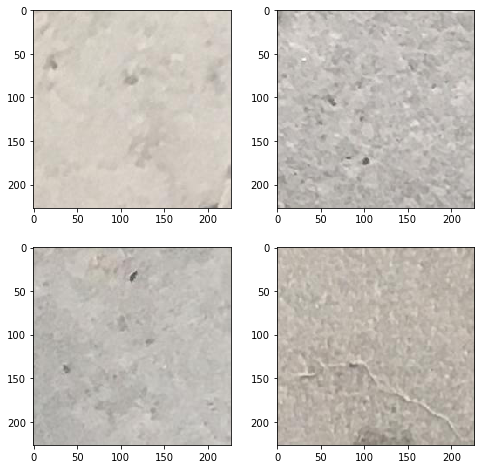

In [16]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(1, 5):
    image_data = Image.open('./Negative/{}'.format(negative_images[i]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_data)
plt.show()

Save the paths to all the images in the *./Positive* directory in a list called **positive_images_dir**.

In [23]:
positive_images = os.listdir('./Positive')
positive_images.sort()
positive_images_dir = ['./Positive/{}'.format(image) for image in positive_images]

Show the first four images with cracked concrete.

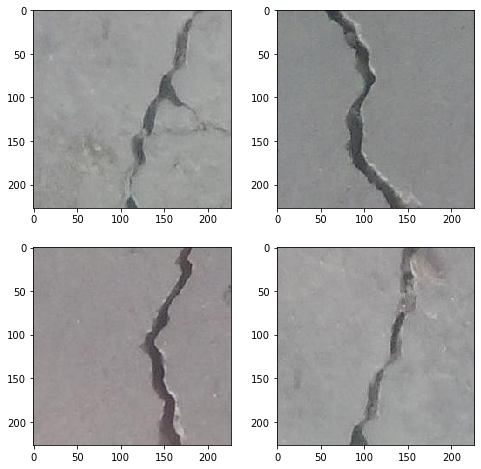

In [26]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(1, 5):
    image_data = Image.open('./Positive/{}'.format(positive_images[i]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_data)
plt.show()

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).